In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm

from scipy import stats

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

In [5]:
#1.deck 컴럼을 삭제하고 나이(age)의 nan 데이터를 삭제 하시요
#2.생존자와 사망자에 대한 갯수를 구하시요
#3.등급별(pclass) 평균 생존률을 구하시요
#4. SibSp(가족과탑승) 의 평균 생존율을 구하시요
#5. 혼자탑승(alone)한 인원의 평균 생존율을 구하시요

In [43]:
#1.deck 컴럼을 삭제하고 나이(age)의 nan 데이터를 삭제 하시요
titanic.drop(columns=['deck'], inplace=True)

In [44]:
titanic.dropna(subset=['age'], inplace=True) 

In [150]:
#2. titanic['survived'].sum()  / titanic['survived'].count() * 100
# 2.생존자와 사망자에 대한 갯수를 구하시요
x = titanic['survived'].count() - titanic['survived'].sum()
print ('생존자: %d'%titanic['survived'].sum())
print ('사망자: %d'%x)



생존자: 290
사망자: 424


In [56]:
#3.등급별(pclass) 평균 생존률을 구하시요
g = titanic.groupby('pclass')
g['survived'].mean()* 100

pclass
1    65.591398
2    47.976879
3    23.943662
Name: survived, dtype: float64

In [85]:
#4  SibSp(가족과탑승) 의 평균 생존율을 구하시요
titanic[titanic['sibsp']>0]['survived'].mean()


0.4732510288065844

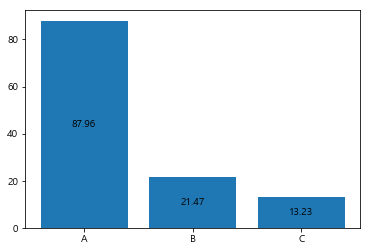

In [128]:
#7.등급별 티켓비용(fare) 의 평균 차트로 그리시요
gc = titanic.groupby('pclass')
y = gc['fare'].mean()
xname = ['A', 'B', 'C']
x = [1, 2, 3]

plt.xticks(x, xname) #x를 xname으로 mapping 해서 보여줌

for mx,my in zip(x,y):
    plt.text (mx,my/2, '%.2f'%my, va='center', ha='center')

    
plt.bar(x, y)
plt.show()



In [86]:
#5. 혼자탑승(alone)한 인원의 평균 생존율을 구하시요
# titanic[titanic['alone']]['survived'].mean()
g = titanic.groupby('alone')
g.mean()

survived    pclass        age     sibsp     parch       fare  \
alone                                                                 
False  0.516129  2.096774  26.413452  1.180645  0.993548  50.398778   
True   0.321782  2.344059  32.220297  0.000000  0.000000  22.644212   

       adult_male  
alone              
False    0.354839  
True     0.750000